# Intel Products Sentiment Analysis

## Introduction


This notebook provides a comprehensive sentiment analysis of Intel product reviews scraped from various online sources. The goal is to clean the data, analyze the sentiment of the reviews, and provide actionable insights and recommendations for improving Intel products based on customer feedback.


## Data Cleaning

In [114]:

import pandas as pd
import re

file_path = 'reviews.csv'
reviews_df = pd.read_csv(file_path)

reviews_df.head()


,rating,content,variant,name,date,verified,sub_reviews
0,NaN,"No doubt, 12th gen Intel processors are a marv...",Style Name: Processor OnlyVerified Purchase,Anish Roy,Reviewed in India on 28 June 2022,True,[]
1,NaN,I have paired this processor with Asus Prime Z...,Style Name: Processor Only,Maxrock89,Reviewed in India on 29 March 2022,False,[]
2,NaN,自分のCPUが結構古いので、12年ぶりにアップグレードしました。\n最初はRYZENに迷って...,Style Name: Processor OnlyVerified Purchase,Andy,Reviewed in Japan on 25 May 2023,True,[]
3,NaN,"Processore eccellente, montato sul pc perfetta...",Style Name: Processor OnlyVerified Purchase,Nicolo,Reviewed in Italy on 13 February 2024,True,[]
4,NaN,"Does exactly what it's supposed to do, my comp...",Style Name: Processor OnlyVerified Purchase,Allan,Reviewed in Canada on 23 May 2024,True,[]



### Handling Missing Values
We'll remove rows with missing values in the 'content' column to ensure we have complete data for analysis.


In [115]:

reviews_df = reviews_df.dropna(subset=['content'])
reviews_df.head()


,rating,content,variant,name,date,verified,sub_reviews
0,NaN,"No doubt, 12th gen Intel processors are a marv...",Style Name: Processor OnlyVerified Purchase,Anish Roy,Reviewed in India on 28 June 2022,True,[]
1,NaN,I have paired this processor with Asus Prime Z...,Style Name: Processor Only,Maxrock89,Reviewed in India on 29 March 2022,False,[]
2,NaN,自分のCPUが結構古いので、12年ぶりにアップグレードしました。\n最初はRYZENに迷って...,Style Name: Processor OnlyVerified Purchase,Andy,Reviewed in Japan on 25 May 2023,True,[]
3,NaN,"Processore eccellente, montato sul pc perfetta...",Style Name: Processor OnlyVerified Purchase,Nicolo,Reviewed in Italy on 13 February 2024,True,[]
4,NaN,"Does exactly what it's supposed to do, my comp...",Style Name: Processor OnlyVerified Purchase,Allan,Reviewed in Canada on 23 May 2024,True,[]



### Text Cleaning
We'll clean the text by converting it to lowercase, removing newlines, and removing punctuation.


In [116]:

def clean_text(text):
    text = text.lower()  
    text = re.sub(r'\n', ' ', text)  
    text = re.sub(r'[^a-z0-9\s]', '', text)  
    return text

reviews_df['cleaned_content'] = reviews_df['content'].apply(clean_text)

reviews_df[['content', 'cleaned_content']].head()


,content,cleaned_content
0,"No doubt, 12th gen Intel processors are a marv...",no doubt 12th gen intel processors are a marve...
1,I have paired this processor with Asus Prime Z...,i have paired this processor with asus prime z...
2,自分のCPUが結構古いので、12年ぶりにアップグレードしました。\n最初はRYZENに迷って...,cpu12 ryzen ryzencpu pc
3,"Processore eccellente, montato sul pc perfetta...",processore eccellente montato sul pc perfettam...
4,"Does exactly what it's supposed to do, my comp...",does exactly what its supposed to do my comput...


## Sentiment Analysis

In [117]:

from textblob import TextBlob

def analyze_sentiment_textblob(text):
    blob = TextBlob(text)
    if blob.sentiment.polarity > 0:
        return 'positive'
    elif blob.sentiment.polarity < 0:
        return 'negative'
    else:
        return 'neutral'

reviews_df['sentiment'] = reviews_df['cleaned_content'].apply(analyze_sentiment_textblob)

reviews_df[['cleaned_content', 'sentiment']].head()


,cleaned_content,sentiment
0,no doubt 12th gen intel processors are a marve...,positive
1,i have paired this processor with asus prime z...,positive
2,cpu12 ryzen ryzencpu pc,neutral
3,processore eccellente montato sul pc perfettam...,neutral
4,does exactly what its supposed to do my comput...,positive


## Sentiment Distribution

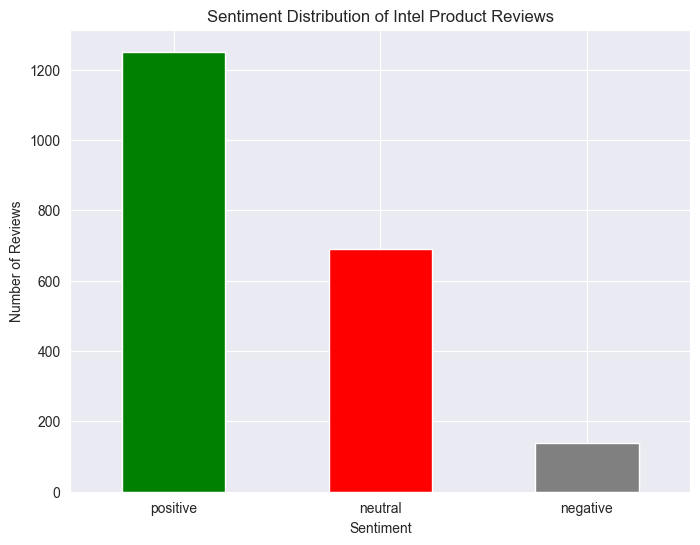

sentiment
positive    1251
neutral      690
negative     138
Name: count, dtype: int64

In [118]:

import matplotlib.pyplot as plt

sentiment_counts = reviews_df['sentiment'].value_counts()

plt.figure(figsize=(8, 6))
sentiment_counts.plot(kind='bar', color=['green', 'red', 'gray'])
plt.title('Sentiment Distribution of Intel Product Reviews')
plt.xlabel('Sentiment')
plt.ylabel('Number of Reviews')
plt.xticks(rotation=0)
plt.show()

sentiment_counts


## Generating WORDCLOUD of Reviews
This helps us find out the most frequently used words in the reviews

In [119]:
from wordcloud import WordCloud
from nltk.corpus import stopwords
from nltk import sent_tokenize,word_tokenize
import nltk
from tqdm.notebook import tqdm
def wc(data,bgc,title):
    plt.figure(figsize=(100,100))
    wc=WordCloud(background_color=bgc,max_words=500,max_font_size=50)
    wc.generate(' '.join(data))
    plt.imshow(wc)
    plt.title(title)
    plt.axis('off')
    plt.show()

In [120]:
n_df=pd.read_csv('cleaned_reviews_textblob.csv')
stop_words = list(stopwords.words('english'))
pos_sen_content=n_df[n_df['sentiment']=='positive']
neu_sen_content=n_df[n_df['sentiment']=='neutral']
neg_sen_content=n_df[n_df['sentiment']=='negative']

In [126]:
print(pos_sen_content.isnull().sum())

index              0
cleaned_content    0
sentiment          0
dtype: int64


In [127]:
print(neu_sen_content.isnull().sum())

index               0
cleaned_content    23
sentiment           0
dtype: int64


In [128]:
print(neg_sen_content.isnull().sum())

index              0
cleaned_content    0
sentiment          0
dtype: int64


In [129]:
# Filling nan datas with an empty string
neu_sen_content=neu_sen_content.fillna('')

In [130]:
pos_sen_content.reset_index(inplace=True)
neu_sen_content.reset_index(inplace=True)
neg_sen_content.reset_index(inplace=True)

In [131]:
# len(pos_sen_content)
import re
import nltk
nltk.download('stopwords')
from nltk.corpus import stopwords
from nltk.stem.porter import PorterStemmer

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\KIIT\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


## WordCloud of Positive Reviews

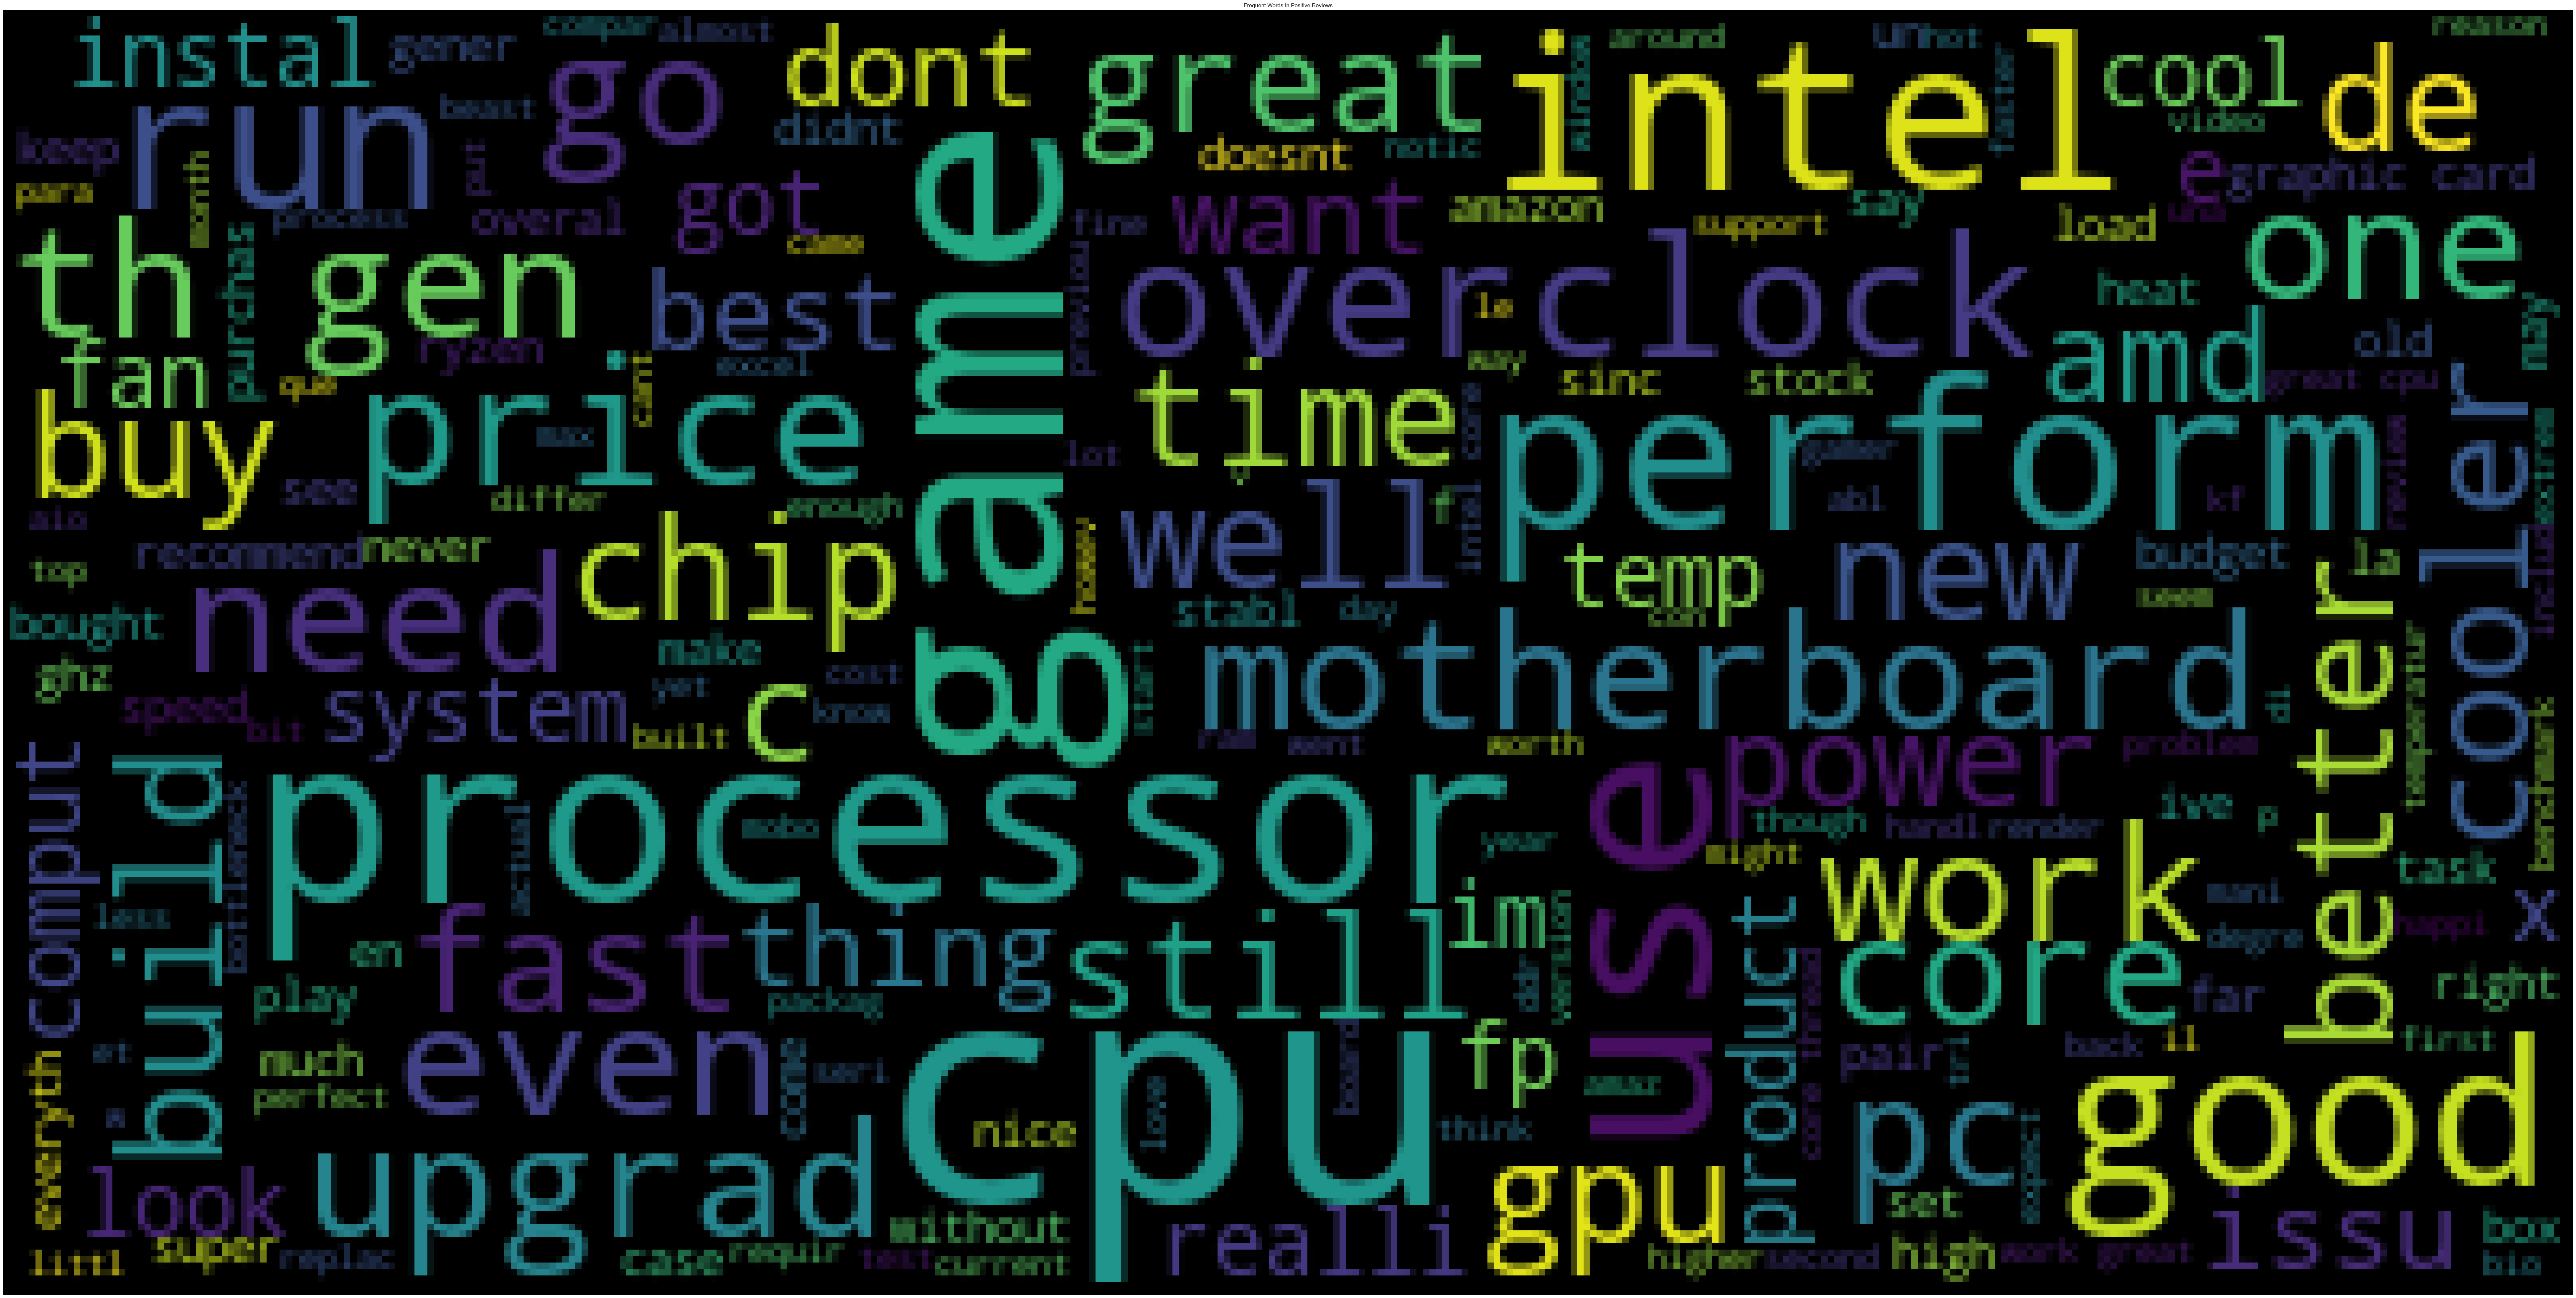

In [132]:
corpus=[]
for i in range(0,len(pos_sen_content)):
    review = re.sub(pattern='[^a-zA-Z]',repl=' ',string=pos_sen_content["cleaned_content"][i])
    review = review.lower()
    review = review.split()
    ps=PorterStemmer()
    stop_words=stopwords.words('english')
    stop_words.remove("not")
    review = [ps.stem(word) for word in review if not word in set(stop_words)]
    review = ' '.join(review)
    corpus.append(review)
wc(corpus,'black','Frequent Words In Positive Reviews')

## WordCloud of Neutral Reviews

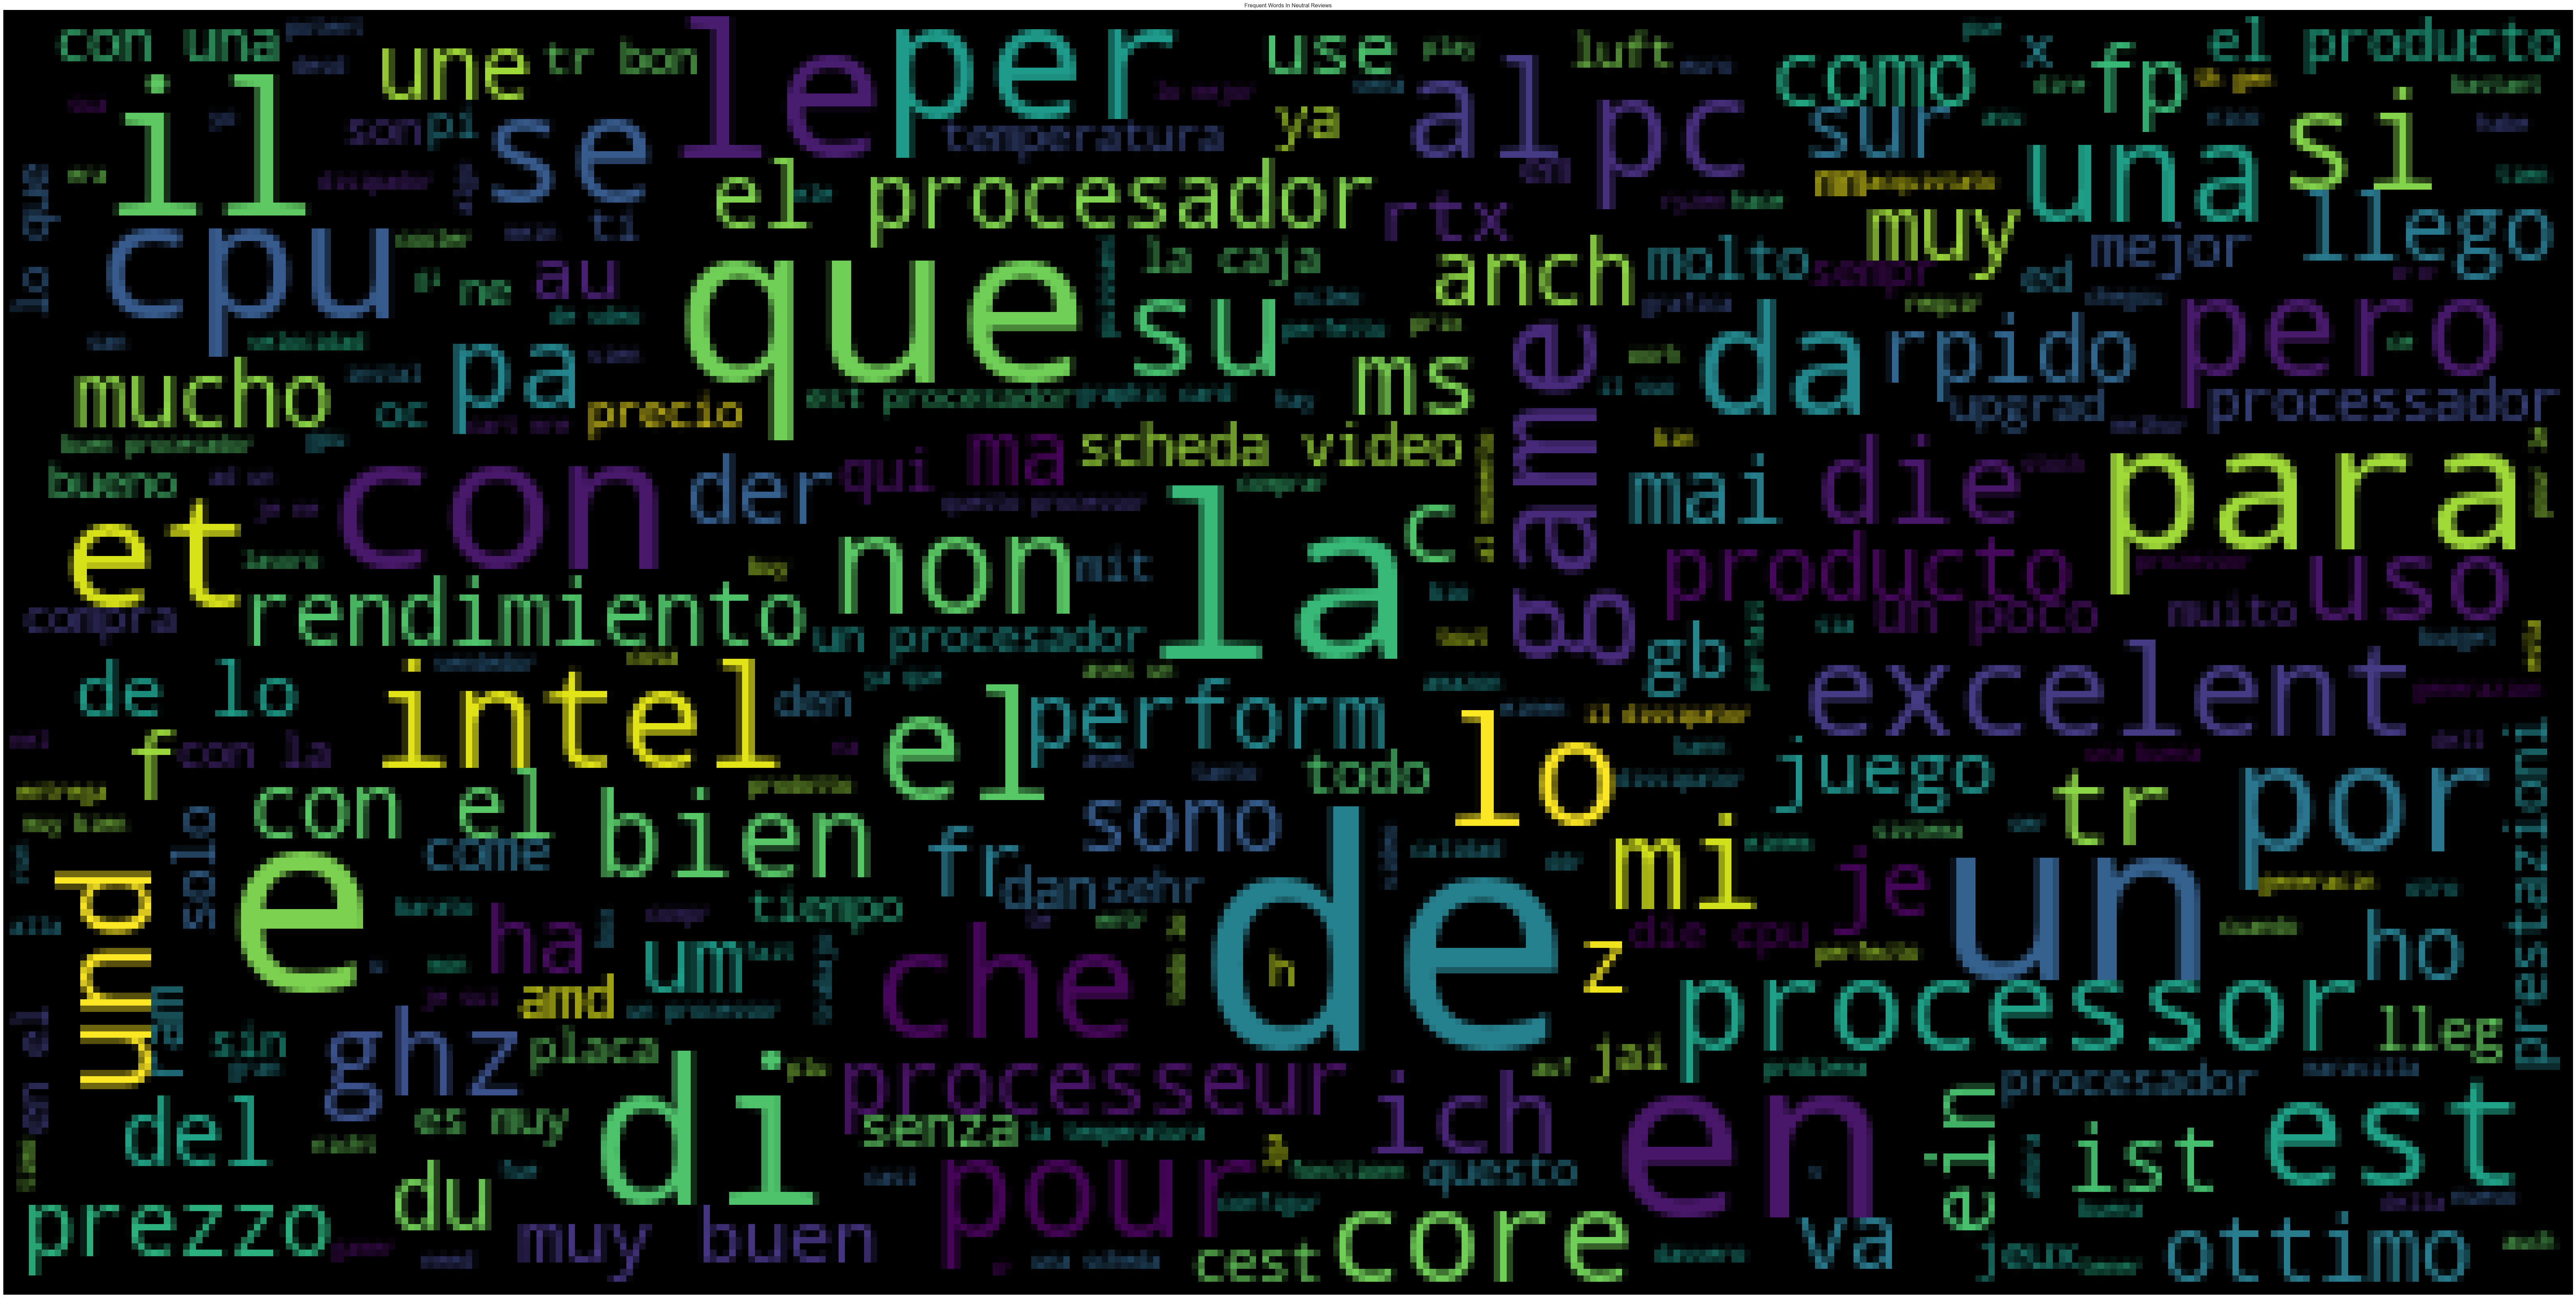

In [133]:
corpus=[]
for i in range(0,len(neu_sen_content)):
    review = re.sub(pattern='[^a-zA-Z]',repl=' ',string=neu_sen_content["cleaned_content"][i])
    review = review.lower()
    review = review.split()
    # ps=PorterStemmer()
    stop_words=stopwords.words('english')
    stop_words.remove("not")
    review = [ps.stem(word) for word in review if not word in set(stop_words)]
    review = ' '.join(review)
    corpus.append(review)
wc(corpus,'black','Frequent Words In Neutral Reviews')

## WordCloud of Negative Reviews

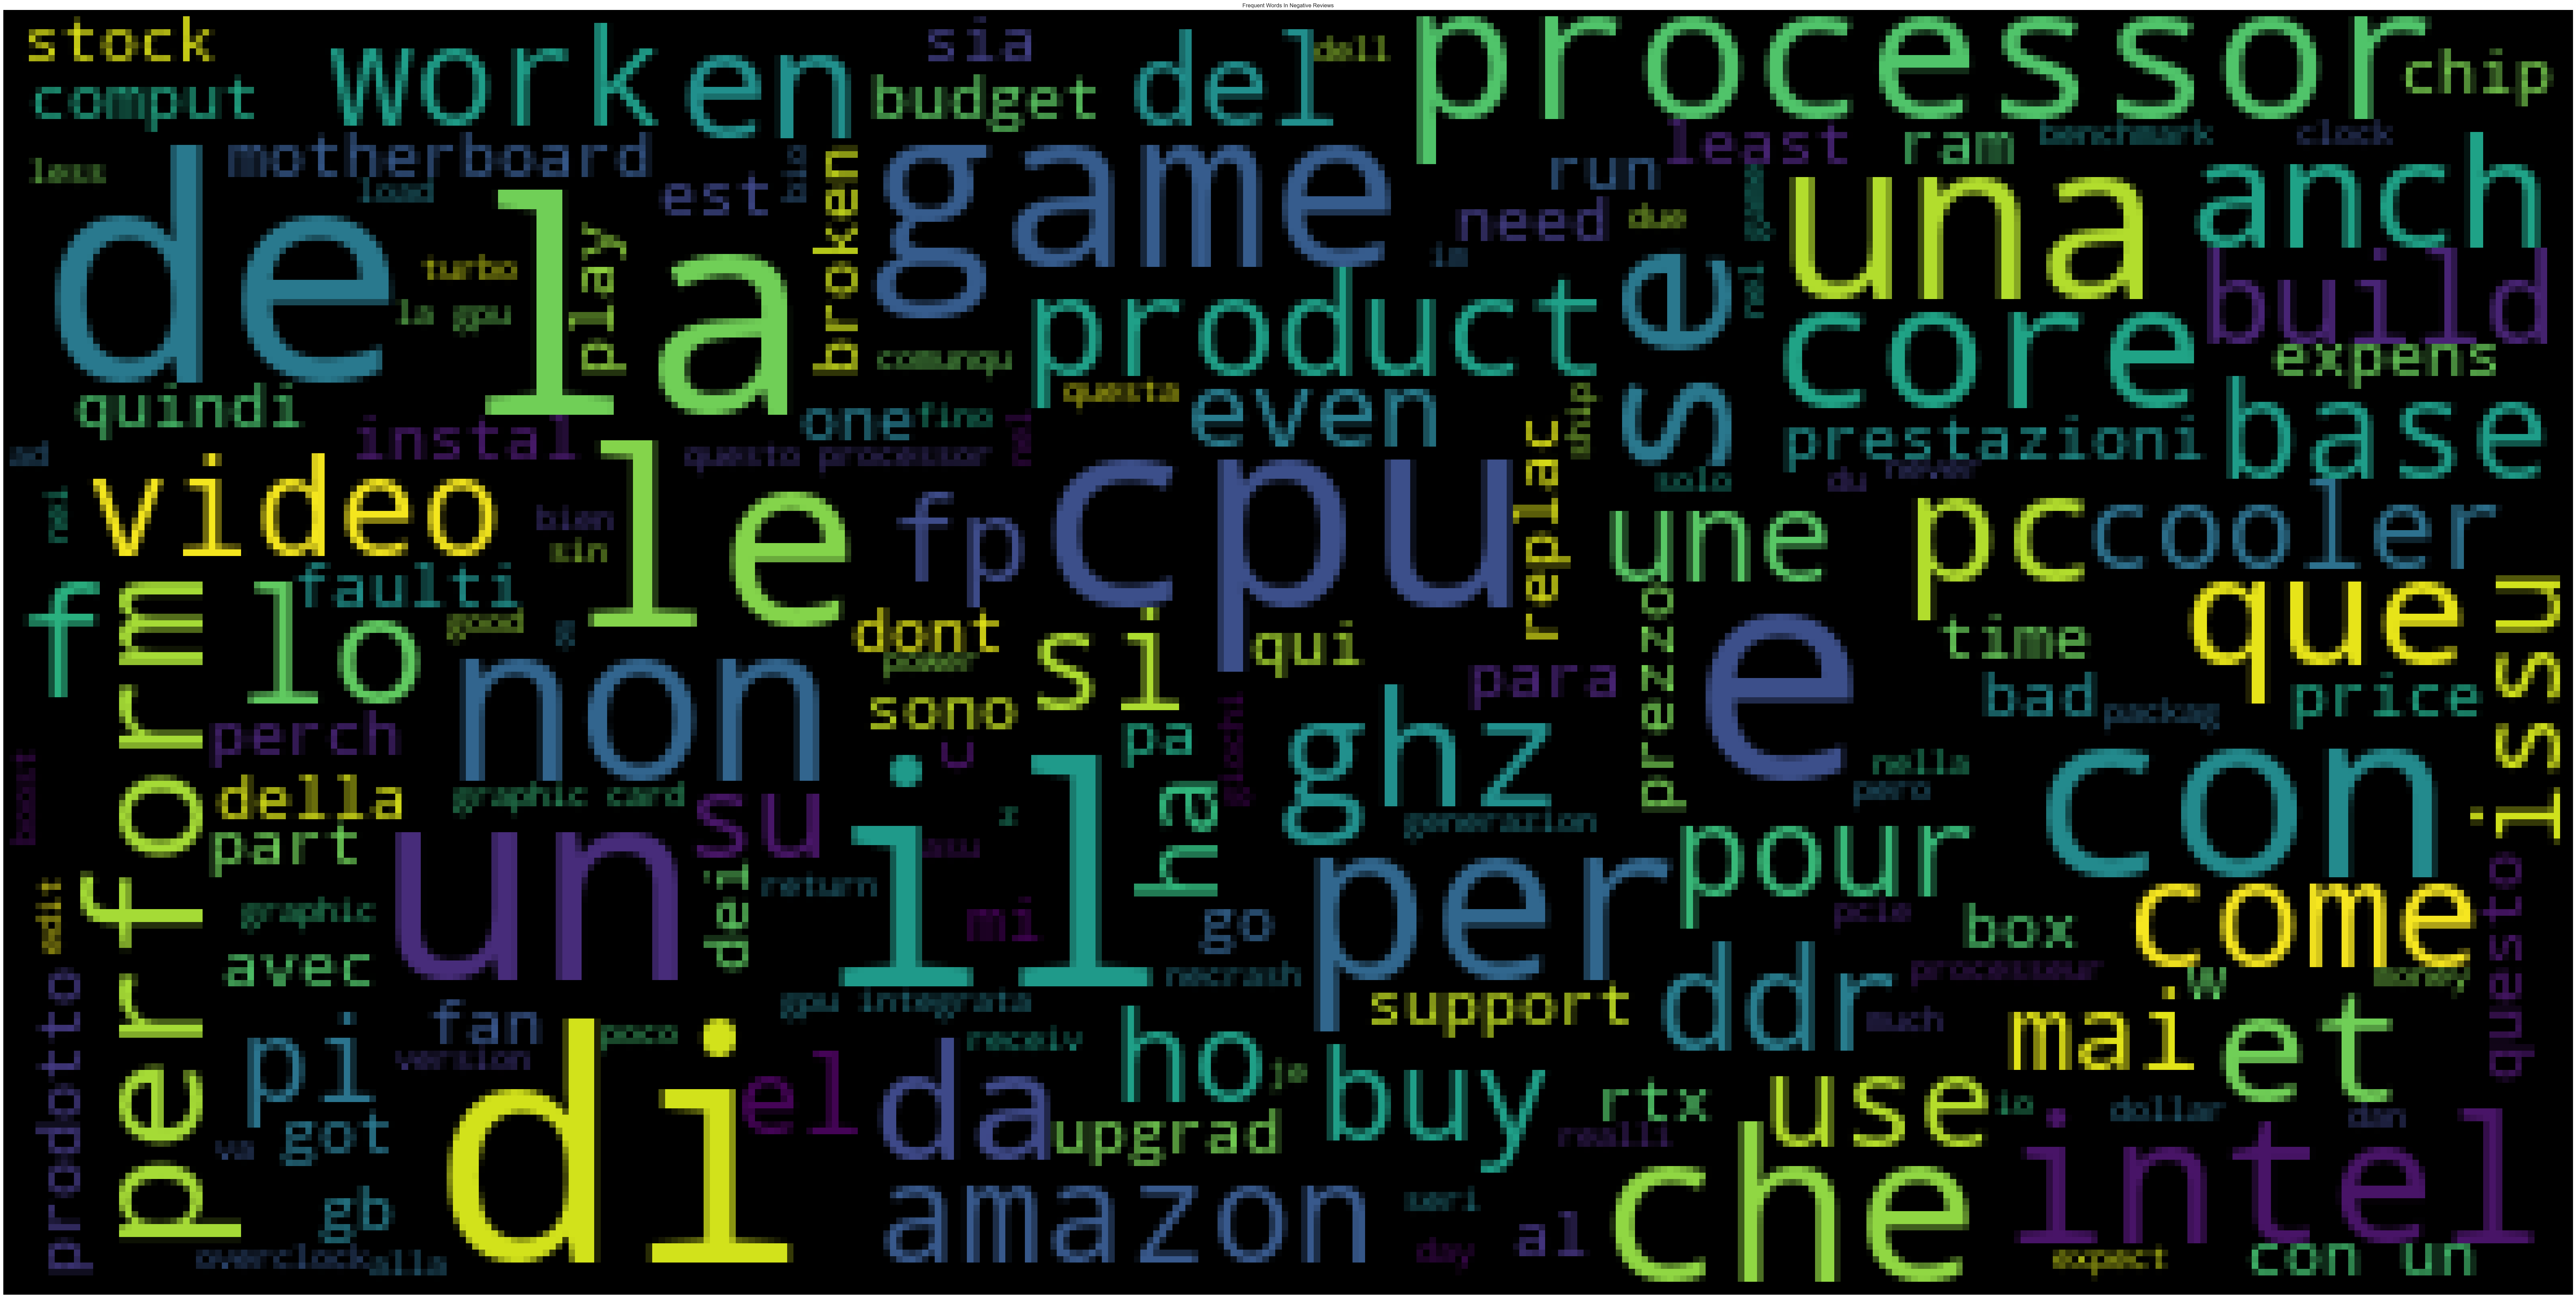

In [134]:
corpus=[]
for i in range(0,len(neg_sen_content)):
    review = re.sub(pattern='[^a-zA-Z]',repl=' ',string=neg_sen_content["cleaned_content"][i])
    review = review.lower()
    review = review.split()
    # ps=PorterStemmer()
    stop_words=stopwords.words('english')
    stop_words.remove("not")
    review = [ps.stem(word) for word in review if not word in set(stop_words)]
    review = ' '.join(review)
    corpus.append(review)
wc(corpus,'black','Frequent Words In Negative Reviews')

## Insights and Recommendations


### Sentiment Distribution

- **Positive Reviews**: The majority of the reviews are positive, indicating a generally favorable perception of Intel products among customers.
- **Neutral Reviews**: A significant number of reviews are neutral, suggesting areas where improvements or more detailed feedback might be provided.
- **Negative Reviews**: Although relatively few, negative reviews highlight areas where customers are dissatisfied.

### Recommendations

1. **Strengthen Positives**: Leverage the aspects customers are happy with, such as performance and compatibility, to market the products more effectively.
2. **Address Neutral Feedback**: Investigate the neutral reviews to understand what might be missing or unclear. Provide more detailed product information and support to convert neutral feedback into positive.
3. **Improve Negatives**: Focus on the areas highlighted in negative reviews. Common issues might include product quality, customer service, or specific features that need improvement.


## Conclusion


This sentiment analysis of Intel product reviews provides valuable insights into customer perceptions and areas for improvement. By addressing the feedback, Intel can enhance customer satisfaction and product quality.
